<a href="https://colab.research.google.com/github/akwesi-duodu/mod-sim/blob/main/akwesi_ntimduodu_48952026_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name: Akwesi Ntim Duodu
### Cohort: B
### Student ID: 48952026
### <span style="color:red"> Deadline: Friday 14th February. 11:59 PM </span>

# --- Assignment No. 2 ---


### Aim: To retrieve information from datasets in the form of charts/graphs/etc

https://ourworldindata.org/grapher/life-expectancy.csv.

The above link contains data about countries and their life expectancies over a period
of time. Using the link above, solve the following questions:

### Import libraries and files here

In [1]:
# Import libraries and files here
import pandas as pd
import matplotlib as plt
from google.colab import files
files_upload=files.upload()

Saving life-expectancy (1).csv to life-expectancy (1).csv


### Question 1a [30 Marks]
Retrieve data about Ghana and Mauritius , draw a graph of life
expectancies for these two countries for comparison purposes. For
comparison purposes, make sure the years you are comparing are the same
, so select the same start years and end years that are common to both.
Decorate the graph with “Ghana vs Mauritius – Life Expectancies from 19XX
to 20YYY


In [2]:
# Solution Here
import io
df = pd.read_csv(io.BytesIO(files_upload['life-expectancy (1).csv']))
cols = [0,1,2,3]#index,entity,code and year columns
df = df[df.columns[cols]]
print(df)

            Entity Code  Year  \
0      Afghanistan  AFG  1950   
1      Afghanistan  AFG  1951   
2      Afghanistan  AFG  1952   
3      Afghanistan  AFG  1953   
4      Afghanistan  AFG  1954   
...            ...  ...   ...   
21560     Zimbabwe  ZWE  2019   
21561     Zimbabwe  ZWE  2020   
21562     Zimbabwe  ZWE  2021   
21563     Zimbabwe  ZWE  2022   
21564     Zimbabwe  ZWE  2023   

       Period life expectancy at birth - Sex: total - Age: 0  
0                                                28.1563      
1                                                28.5836      
2                                                29.0138      
3                                                29.4521      
4                                                29.6975      
...                                                  ...      
21560                                            61.0603      
21561                                            61.5300      
21562                               

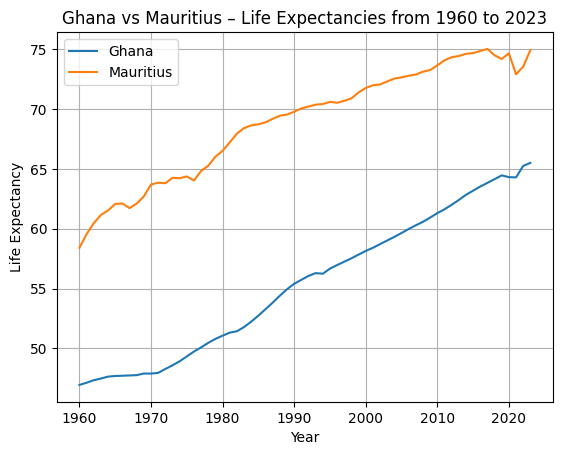

In [3]:
#data on Ghana and Mauritius
import matplotlib.pyplot as plt
df_ghana = df[df['Entity'] == 'Ghana']          #the use of boolean indexing ensures that under the 'entity' column selects rows 'Ghana' and 'Mauritius'
df_mauritius = df[df['Entity'] == 'Mauritius']

start_year=1960
end_year=2023
filtered_df=df[
    (df['Entity'].isin(['Ghana','Mauritius']))&   #'isin' method checks if the value is present in the Entity column
    (df['Year']>=start_year)&
    (df['Year']<=end_year)
]

plt.plot(filtered_df[filtered_df['Entity']=='Ghana']['Year'],
         filtered_df[filtered_df['Entity']=='Ghana']['Period life expectancy at birth - Sex: total - Age: 0'],
         label='Ghana')
plt.plot(filtered_df[filtered_df['Entity']=='Mauritius']['Year'],
         filtered_df[filtered_df['Entity']=='Mauritius']['Period life expectancy at birth - Sex: total - Age: 0'],
         label='Mauritius')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Ghana vs Mauritius – Life Expectancies from 1960 to 2023')
plt.grid()
plt.show()

---

### Question 1b [20 Marks]
Add any other third country of your choice from the same dataset, and plot
the data on the same graph for comparison purposes.

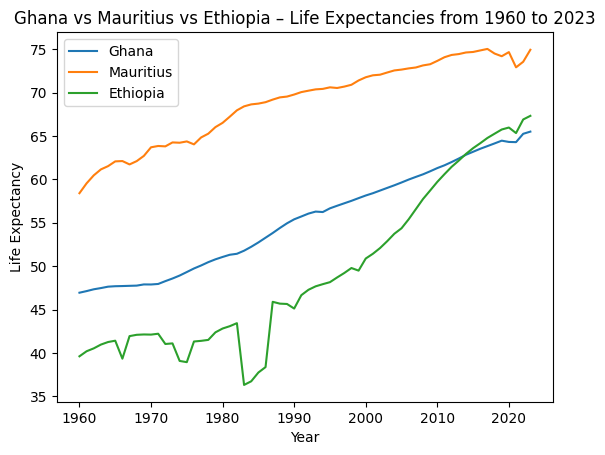

In [4]:
# Solution Here

df_ghana = df[df['Entity'] == 'Ghana']
df_mauritius = df[df['Entity'] == 'Mauritius']
df_ethiopia = df[df['Entity'] == 'Ethiopia']#third country of choice

start_year=1960
end_year=2023
filtered_df=df[
    (df['Entity'].isin(['Ghana','Mauritius','Ethiopia']))&
    (df['Year']>=start_year)&
    (df['Year']<=end_year)
]

plt.plot(filtered_df[filtered_df['Entity']=='Ghana']['Year'],
         filtered_df[filtered_df['Entity']=='Ghana']['Period life expectancy at birth - Sex: total - Age: 0'],
         label='Ghana')
plt.plot(filtered_df[filtered_df['Entity']=='Mauritius']['Year'],
         filtered_df[filtered_df['Entity']=='Mauritius']['Period life expectancy at birth - Sex: total - Age: 0'],
         label='Mauritius')
plt.plot(filtered_df[filtered_df['Entity']=='Ethiopia']['Year'],
         filtered_df[filtered_df['Entity']=='Ethiopia']['Period life expectancy at birth - Sex: total - Age: 0'],
         label='Ethiopia')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Ghana vs Mauritius vs Ethiopia – Life Expectancies from 1960 to 2023')
plt.show()

---

### Question 2 [30 Marks]
Ghana’s data is up to 2023 from the above dataset. Develop a model that
can help your predict the life expectancy of Ghanaians by the year 2050.

In [5]:
# Solution Here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


#defining a linear regression model
def simple_linear_regression(X,Y):
  X_mean=np.mean(X)
  y_mean=np.mean(Y)
  numerator=np.sum((X-X_mean)*(Y-y_mean))
  denominator=np.sum(np.power(X-X_mean,2))
  slope=numerator/denominator
  y_intercept=y_mean-slope*X_mean
  return slope,y_intercept

x_selected=df_ghana['Year']
y_selected=df_ghana['Period life expectancy at birth - Sex: total - Age: 0']
#Using the selected columns for year and life expectancy
#fit the linear regression model
slope,y_intercept=simple_linear_regression(x_selected,y_selected)
life_expectancy_pred=slope*2050+y_intercept
print(f"the life expectancy for Ghana by 2050 will be:{life_expectancy_pred:.2f}")



the life expectancy for Ghana by 2050 will be:73.90


---

### Question 3 [20 Marks]
Plot a graph showing the actual data up to 2023 and the expected data
from 2023 up to 2050. Give reasons why you think your model is correct


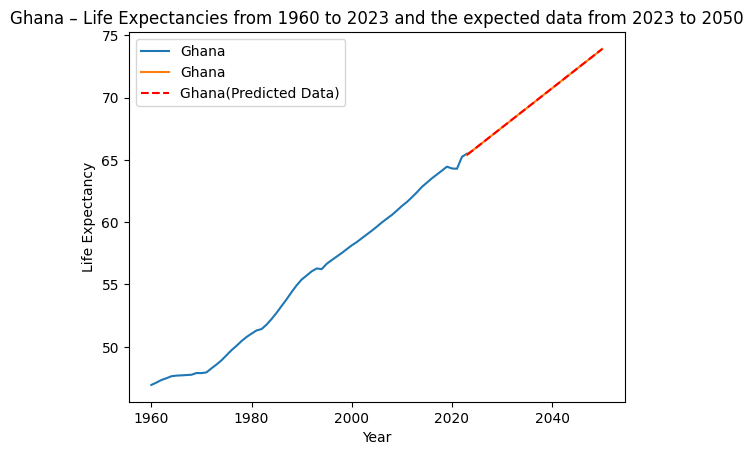

In [6]:
# Solution Here

df_ghana = df[df['Entity'] == 'Ghana']

start_year=1960
end_year=2023
filtered_df=df[
    (df['Entity'].isin(['Ghana']))&
    (df['Year']>=start_year)&
    (df['Year']<=end_year)
]

plt.plot(filtered_df[filtered_df['Entity']=='Ghana']['Year'],
         filtered_df[filtered_df['Entity']=='Ghana']['Period life expectancy at birth - Sex: total - Age: 0'],
         label='Ghana')
#expected population growth
future_years=np.arange(2023,2051)#numpy container to hold the years from 2023 to 2050. arange generates up to and not includign stop value.
predicted_life_expectancy=slope*future_years+y_intercept
plt.plot(future_years,predicted_life_expectancy,label='Ghana')

plt.plot(future_years, predicted_life_expectancy, label='Ghana(Predicted Data)',color="red",linestyle="--")#x_value=years,y_value=life_expectancy
plt.legend()
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Ghana – Life Expectancies from 1960 to 2023 and the expected data from 2023 to 2050')
plt.show()


**Reasons on model being correct**

*  With regards to population growth, the most commonly used and generally accurate predictive model has been the logistic growth rate.
This has been so becase the logistic growth rate more closely models the sudden increases, plateau and declines in population than linear models which are more accurate reflections of actual population trends.
*  Regardless, I believe the linear model is a good enough estimator of population trends particularly in this use case because linear models are appropriate for effective short-term population forecasts(i.e.this use-case considers only a 27/28 year difference which is considerably smaller than estimating for 100 years for which logistic is appropriate).
*  Also the historical data is showing a consistent trend and linear models are appropriate for these. There are no reasons to account for sudden declines or reaching a carrying capacity under this use-case.
*  Also, linear models are straightforward to understand and implement, making them useful for preliminary analysis or for situations where simplicity is preferred such as these. (explanatory/independent variables are few and plotting considers few variables (i.e.years against life expectancy)).
* Linear models serve as a baseline to compare more complex models, helping to gauge the added value of using more sophisticated methods.